In [805]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fpdf import FPDF


In [806]:
df = pd.read_csv('PDA_Dados_Cursos_Graduacao_Brasil.csv', sep = ',', encoding = 'utf-8')

In [807]:
print(df.head())

   CODIGO_IES                                NOME_IES  \
0        4751         CENTRO UNIVERSITÁRIO UNIFATECIE   
1        1491      CENTRO UNIVERSITÁRIO INTERNACIONAL   
2        1472  CENTRO UNIVERSITÁRIO LEONARDO DA VINCI   
3         221            UNIVERSIDADE CRUZEIRO DO SUL   
4        1472  CENTRO UNIVERSITÁRIO LEONARDO DA VINCI   

      CATEGORIA_ADMINISTRATIVA ORGANIZACAO_ACADEMICA  CODIGO_CURSO  \
0  Privada com fins lucrativos  Centro Universitário       1556773   
1  Privada com fins lucrativos  Centro Universitário       1186955   
2  Privada com fins lucrativos  Centro Universitário         99950   
3  Privada com fins lucrativos          Universidade       1467998   
4  Privada com fins lucrativos  Centro Universitário       1516788   

              NOME_CURSO          GRAU  \
0  ENGENHARIA AGRONÔMICA   Bacharelado   
1                 LETRAS  Licenciatura   
2              GEOGRAFIA  Licenciatura   
3        EDUCAÇÃO FÍSICA   Bacharelado   
4        SERVIÇOS PENAIS  

In [808]:
print(df.columns)

Index(['CODIGO_IES', 'NOME_IES', 'CATEGORIA_ADMINISTRATIVA',
       'ORGANIZACAO_ACADEMICA', 'CODIGO_CURSO', 'NOME_CURSO', 'GRAU',
       'AREA_OCDE', 'MODALIDADE', 'SITUACAO_CURSO', 'QT_VAGAS_AUTORIZADAS',
       'CARGA_HORARIA', 'CODIGO_AREA_OCDE_CINE', 'AREA_OCDE_CINE',
       'CODIGO_MUNICIPIO', 'MUNICIPIO', 'UF', 'REGIAO'],
      dtype='object')


In [809]:
df.describe()

,CODIGO_IES,CODIGO_CURSO,QT_VAGAS_AUTORIZADAS,CARGA_HORARIA,CODIGO_MUNICIPIO
count,902676.000000,9.026760e+05,902676.000000,902676.000000,9.026760e+05
mean,1467.489141,1.275298e+06,6381.206556,2686.126029,3.338364e+06
std,2468.932402,6.064209e+05,14285.560618,1053.743238,9.886000e+05
min,1.000000,1.000000e+00,0.000000,0.000000,1.100015e+06
25%,322.000000,1.285815e+06,764.000000,1920.000000,2.901007e+06
50%,1196.000000,1.440098e+06,2000.000000,2580.000000,3.304557e+06
75%,1491.000000,1.541397e+06,5000.000000,3324.000000,4.114609e+06
max,26777.000000,5.001705e+07,150000.000000,400000.000000,9.000001e+06


In [810]:
# verificar curso com a maior carga horária
carga_max = df['CARGA_HORARIA'].max()
curso_carga_max = df[df['CARGA_HORARIA'] == carga_max]
numero_curso_carga_max = curso_carga_max.shape[0]
print(f'Maior carga horária: {carga_max}')
print(f'Cursos com a maior carga horária: {curso_carga_max}')
print(f'Número de cursos com a maior carga horária: {numero_curso_carga_max}')

Maior carga horária: 400000
Cursos com a maior carga horária:         CODIGO_IES                                           NOME_IES  \
398281       22999  Faculdade de Tecnologia e Ciências - FTC Itapi...   

           CATEGORIA_ADMINISTRATIVA ORGANIZACAO_ACADEMICA  CODIGO_CURSO  \
398281  Privada com fins lucrativos             Faculdade       1434171   

       NOME_CURSO         GRAU AREA_OCDE           MODALIDADE SITUACAO_CURSO  \
398281    DIREITO  Bacharelado   Direito  Educação Presencial   Em atividade   

        QT_VAGAS_AUTORIZADAS  CARGA_HORARIA CODIGO_AREA_OCDE_CINE  \
398281                   200         400000                   164   

       AREA_OCDE_CINE  CODIGO_MUNICIPIO  MUNICIPIO  UF    REGIAO  
398281        Direito           2306405  Itapipoca  CE  NORDESTE  
Número de cursos com a maior carga horária: 1


In [811]:
# distribuição de cursos por instituição - 10 primeiras
numero_curso_inst = df['NOME_IES'].value_counts()
print(numero_curso_inst.head(10))

NOME_IES
CENTRO UNIVERSITÁRIO LEONARDO DA VINCI                                     125921
CENTRO UNIVERSITÁRIO INTERNACIONAL                                          87497
UNIVERSIDADE CESUMAR                                                        86741
Universidade Pitágoras Unopar Anhanguera                                    80052
UNIVERSIDADE PAULISTA                                                       41056
UNIVERSIDADE ESTÁCIO DE SÁ                                                  39839
UNIVERSIDADE CRUZEIRO DO SUL                                                27557
CENTRO UNIVERSITÁRIO ANHANGUERA PITÁGORAS AMPLI                             23447
CENTRO UNIVERSITÁRIO ESTÁCIO DE SANTA CATARINA - ESTÁCIO SANTA CATARINA     19018
UNIVERSIDADE ANHANGUERA                                                     16373
Name: count, dtype: int64


In [812]:
# Contar o número de áreas diferentes por instituição usando 'AREA_OCDE'
variedade_cursos_por_instituicao = df.groupby('NOME_IES')['AREA_OCDE'].nunique()

# Ordenar para ver as instituições com maior variedade de áreas
variedade_cursos_por_instituicao = variedade_cursos_por_instituicao.sort_values(ascending=False)

# Mostrar as 10 instituições com a maior variedade de áreas
print(variedade_cursos_por_instituicao.head(10))


NOME_IES
UNIVERSIDADE ESTÁCIO DE SÁ                                     125
Universidade Pitágoras Unopar Anhanguera                       123
UNIVERSIDADE ANHANGUERA                                        120
CENTRO UNIVERSITÁRIO BRAZ CUBAS                                113
UNIVERSIDADE DE SÃO PAULO                                      110
CENTRO UNIVERSITÁRIO ANHANGUERA PITÁGORAS AMPLI                110
UNIVERSIDADE ANHEMBI MORUMBI                                   109
Centro Universitário Anhanguera Pitágoras Unopar de Niterói    107
UNIVERSIDADE DE FRANCA                                         107
UNIVERSIDADE DE CAXIAS DO SUL                                  104
Name: AREA_OCDE, dtype: int64


In [813]:
# distribuição geográfica dos cursos por estado
cursos_uf = df['UF'].value_counts()
print(cursos_uf)

UF
SP    168912
MG    108603
PR     74455
RS     67169
BA     61680
RJ     48024
SC     47033
PA     39292
CE     35007
GO     32586
PE     27578
MA     26932
MT     24373
ES     22316
MS     18105
AM     12304
PB     12134
RO     11272
PI     11083
RN     10135
AL      9598
SE      8821
TO      8491
AC      5361
DF      4754
AP      3120
RR      2930
ZZ       608
Name: count, dtype: int64


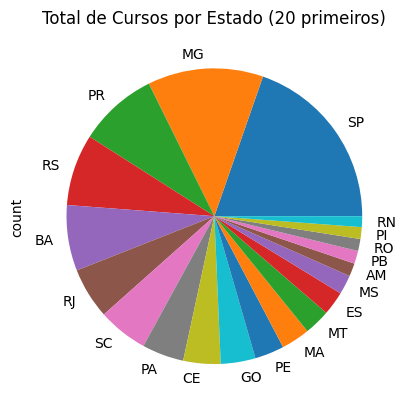

In [814]:
cursos_uf = cursos_uf.head(20)
cursos_uf.plot(kind='pie', color='skyblue', title='Total de Cursos por Estado (20 primeiros)')
plt.savefig('cursos_por_estado.png')
plt.show()

In [815]:
# distibuição geográfica dos cursos por região
cursos_regiao = df['REGIAO'].value_counts()
print(cursos_regiao)

REGIAO
SUDESTE              347855
NORDESTE             202968
SUL                  188657
NORTE                 82770
CENTRO-OESTE          79818
IGNORADO/EXTERIOR       608
Name: count, dtype: int64


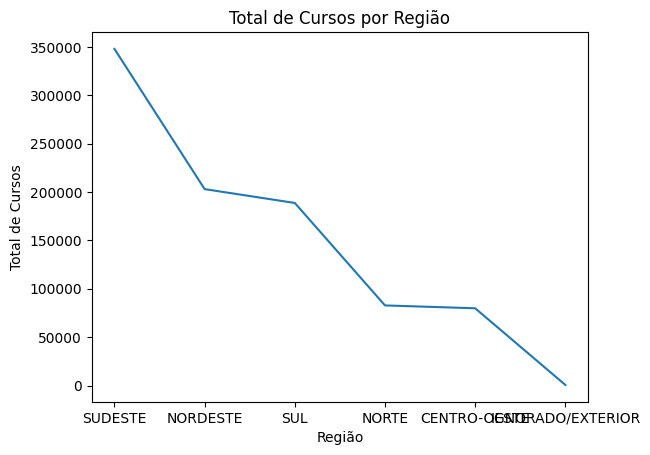

In [816]:
# cursos_regiao.plot(kind='bar', color='skyblue', title='Total de Cursos por Região')
sns.lineplot(cursos_regiao)
plt.title('Total de Cursos por Região')
plt.xlabel('Região')
plt.ylabel('Total de Cursos')
plt.savefig('cursos_por_regiao.png')
plt.show()

In [817]:
# município com maior número de curso
municipio_max = df['MUNICIPIO'].value_counts()
print(f'O município com maior oferta de cursos é: {municipio_max.head(1)}')

O município com maior oferta de cursos é: MUNICIPIO
São Paulo    10564
Name: count, dtype: int64


In [818]:
# disparidade de vagas por região
## somando total de curso por região 
vagas_regiao = df.groupby('REGIAO')['QT_VAGAS_AUTORIZADAS'].sum()
# ordena do maior para o menor
vagas_regiao = vagas_regiao.sort_values(ascending=False)
print(vagas_regiao)

REGIAO
SUDESTE              2333028227
NORDESTE             1218963125
SUL                   944563809
NORTE                 637651691
CENTRO-OESTE          620100529
IGNORADO/EXTERIOR       5854628
Name: QT_VAGAS_AUTORIZADAS, dtype: int64


In [819]:
# calcula média de vagas por curso em cada região
media_vagas_curso = df.groupby('REGIAO')['QT_VAGAS_AUTORIZADAS'].mean()
# ordenar 
media_vagas_curso = media_vagas_curso.sort_values(ascending=False)
print(media_vagas_curso)

REGIAO
IGNORADO/EXTERIOR    9629.322368
CENTRO-OESTE         7768.930930
NORTE                7703.898647
SUDESTE              6706.898642
NORDESTE             6005.691168
SUL                  5006.778487
Name: QT_VAGAS_AUTORIZADAS, dtype: float64


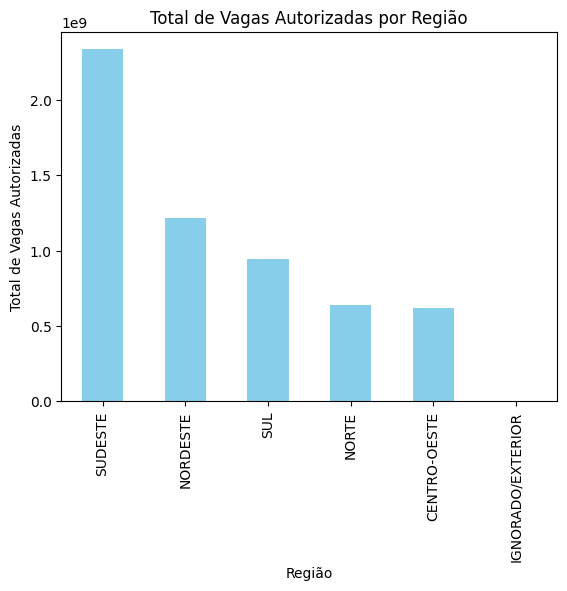

In [820]:
vagas_regiao.plot(kind='bar', color='skyblue', title='Total de Vagas Autorizadas por Região')
plt.xlabel('Região')
plt.ylabel('Total de Vagas Autorizadas')
plt.show()

In [821]:
# verificando situação dos cursos
cursos_atividade = df['SITUACAO_CURSO'].value_counts()
print(cursos_atividade)

SITUACAO_CURSO
Em atividade    852920
Extinto          39494
Em extinção      10262
Name: count, dtype: int64


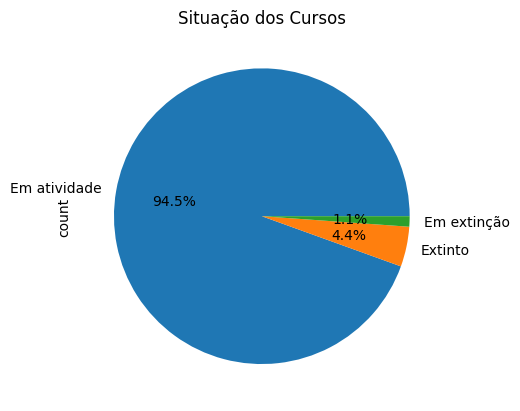

In [822]:
# plotando gráfico
cursos_atividade.plot(kind='pie', color='skyblue', title='Situação dos Cursos', autopct='%1.1f%%')
plt.show()

In [823]:
# comparando públicas e privadas
instituicoes = df['CATEGORIA_ADMINISTRATIVA'].value_counts()
print(instituicoes)

CATEGORIA_ADMINISTRATIVA
Privada com fins lucrativos    761454
Privada sem fins lucrativos    112023
Pública Federal                 14802
Pública Estadual                 9980
Pública Municipal                3634
Especial                          783
Name: count, dtype: int64


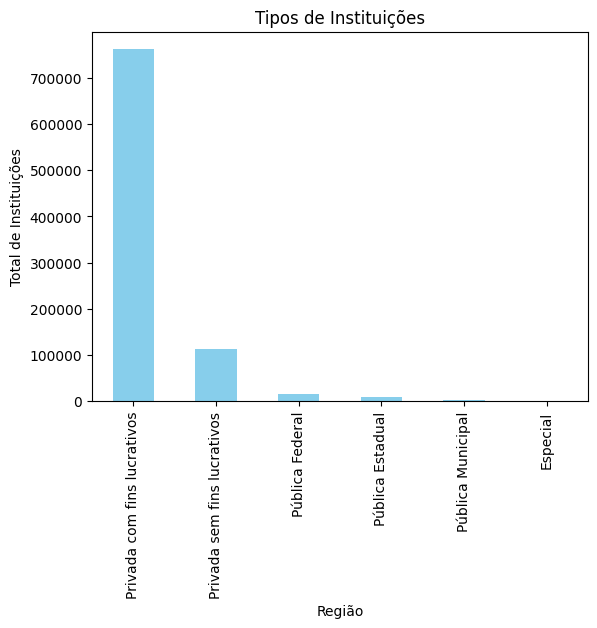

In [824]:
# plotando gráfico
instituicoes.plot(kind='bar', color='skyblue', title='Tipos de Instituições')
plt.xlabel('Região')
plt.ylabel('Total de Instituições')
plt.savefig('cursos_por_intituicao.png')
plt.show()

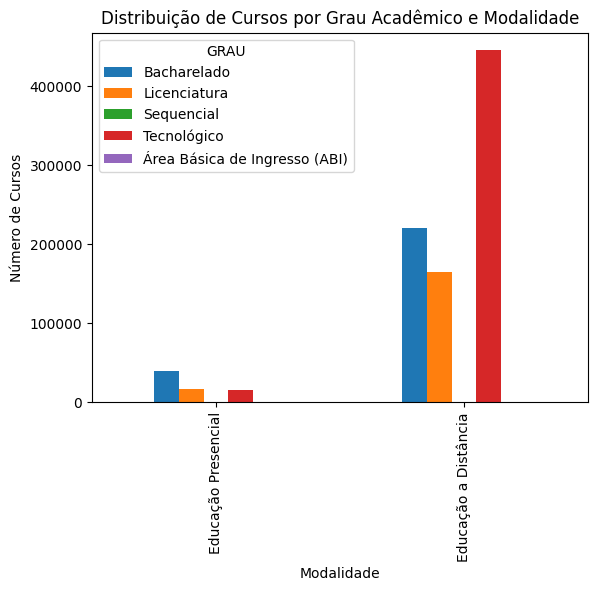

In [825]:
# análise por grau
grau = df.groupby(['MODALIDADE', 'GRAU']).size().unstack(fill_value=0)
grau.plot(kind='bar', stacked=False)
plt.xlabel('Modalidade')
plt.ylabel('Número de Cursos')
plt.title('Distribuição de Cursos por Grau Acadêmico e Modalidade')
plt.savefig('cursos_por_grau_modalidade.png')
plt.show()

In [826]:
class PDF(FPDF):
    def header(self):
        # Setting font: helvetica bold 15
        self.set_font("helvetica", "B", 15)
        # Moving cursor to the right:
        self.cell(80)
        # Printing title:
        self.cell(40, 10, "Projeto Python - Kick", align="C")
        self.cell(-40, 25, "Mateus Costa - Turma J", align="C")
        # Performing a line break:
        self.ln(20)

    def footer(self):
        # Position cursor at 1.5 cm from bottom:
        self.set_y(-15)
        # Setting font: helvetica italic 8
        self.set_font("helvetica", "I", 8)
        # Printing page number:
        self.cell(0, 10, f"Page {self.page_no()}/{{nb}}", align="C")

In [827]:
pdf = PDF()
pdf.add_page()
pdf.set_font("Times", size=12)
pdf.cell(0, 10, 'A ideia do projeto é verificar a desigualdade na educação brasileira atráves dos cursos de graduação.', new_x="LMARGIN", new_y="NEXT")
pdf.cell(0, 10, 'Utilizei dados do MEC para realizar a análise de dados, verificando as diferenças no cursos de graduação.', new_x="LMARGIN", new_y="NEXT")


False

In [828]:
pdf.multi_cell(0, 10, 'O gráfico a seguir mostra uma distribuição de cursos por estado. Nele podemos verificar as regiões que mais oferecem curso.', new_x="LMARGIN", new_y="NEXT")
pdf.image('cursos_por_estado.png', x=10, y=110, w=180)
pdf.multi_cell(0, 10, 'Podemos verificar que o estado de São Paulo possui a maior concentração de cursos. Isso pode significar que o estado possui uma alta densidade populacional, o que gera uma demanda maior por instituições de ensino.', new_x="LMARGIN", new_y="NEXT")
pdf.multi_cell(0, 10, 'Outro motivo é a concentração de renda. São Paulo é o centro econômico do país, o que significa que concentra a maior parte da renda também. Isso gera muita desigualdade.', new_x="LMARGIN", new_y="NEXT")

False

In [829]:
pdf.add_page()

In [830]:
pdf.multi_cell(0, 10, 'Esse gráfico também mostra a distribuição, mas dessa vez por região. Podemos ver que a região que se destaca é Sudeste, o que reforça os pontos citados acima.', new_x="LMARGIN", new_y="NEXT")
pdf.image('cursos_por_regiao.png', x=10, y=90, w=180)

{'data': b'x\x9c\xec\xdd\t\\\x14\xe5\xff\x07p\xd4\x80\x10\x0f4\xc8\x14\x15o+\xc9\xa3\xbcK\xcbT\xd4\x0eL\xcb\xcc\x0e-\x0b\xc5#\xfd\xe7\x15x\x91\x9a\xe0\x89\x16^\xe4\x99?\xcd[\xb4\xe4R\x01Q\xe4H\xe4>\x059C\x0e\xe5\x90\xfb\xd8]\xfe_\x18\x9d\xa6\x95\x1b\x96\xd9}\xf6\xf3~\xf5\xea5;\xb3;\xfb\xec<\xeb\xf7\xb3\xcf2;\x8fF9\x00\x00\x004;\r\xb1\x1b\x00\x00\x00\xa0\x8e\x10\xc0\x00\x00\x00"@\x00\x03\x00\x00\x88\x00\x01\x0c\x00\x00 \x02\x040\x00\x00\x80\x08\x10\xc0\x00\x00\x00"@\x00\x03\x00\x00\x88\x00\x01\x0c\x00\x00 \x02\x040\x00\x00\x80\x08\x10\xc0\x00\x00\x00"@\x00\x03\x00\x00\x88\x00\x01\x0c\x00\x00 \x02\x040\x00\x00\x80\x08\x10\xc0\x00\x00\x00"@\x00\x03\x00\x00\x88\x00\x01\x0c\x00\x00 \x02\x040\x00\x00\x80\x08\x10\xc0\x00\x00\x00"@\x00\x03\x00\x00\x88\x00\x01\x0c\x00\x00 \x02\x040\x00\x00\x80\x08\x10\xc0\x00\x00\x00"@\x00\x03\x00\x00\x88\x00\x01\x0c\x00\x00 \x02\x040\x00\x00\x80\x08\x10\xc0\x00\x00\x00"@\x00\x03\x00\x00\x88\x00\x01\x0c\x00\x00 \x02\x040\x00\x00\x80\x08\x10\xc0\x00\x00\x00"@\x0

In [831]:
pdf.add_page()

In [832]:
pdf.multi_cell(0, 10, 'Aqui conseguimos ver a distribuição de cursos por instituições. Podemos ver que a oferta por cursos vem, na grande maioria, pelas instituições privadas, o que cerceia o ingresso de grande parte da sociedade, uma parte mais carente. ', new_x="LMARGIN", new_y="NEXT")
pdf.image('cursos_por_intituicao.png', x=10, y=90, w=180)
pdf.multi_cell(0, 10, 'A provável solução seria o investimento do governo, tanto federal quando estadual, em mais instituições de ensino, para abranger uma quantidade maior de pessoas e tornar a educação democrática.')

False

In [833]:
pdf.add_page()

In [834]:
pdf.multi_cell(0, 10, 'Esse último gráfico nos traz um dado importante. Podemos verificar que o número de cursos com a modalidade EaD é maior. Isso nos mostra que é possível estudar em um tempo mais flexível, ajundado pessoas que trabalham, não consegue se locomover até a faculdade, que possuem filhos, entre outras variáveis. Isso nos trás uma certa esperança, que talvez o ensino superior esteja mais democrático')
pdf.image('cursos_por_grau_modalidade.png',  x=10, y=90, w=180)

{'data': b'x\x9c\xec\x9d\x07x\xd5\xd4\xff\xff\x0b\x85\x96\x0eJiK\x81B){V\xf6\x86\xb272\x15QT\x94)\x1b\x05\xcb\x10\x10\x04d\x08"\xc8\x16\x05\x94\xad\x80\xa0,A\x86l\xa4\xb2\xa1\xcc2*[~T\xf6*\xf7\xff\xf6\x9e/\xf9\x87\xbb\x08\x90;r\xfa~=<<\xb9I\xee\xc9I\xce\xc9\xe7u>\xb9I\xeae"\x84\x10B\x88\xcb\xf1rw\x05\x08!\x84\x90\x94\x08\x05L\x08!\x84\xb8\x01\n\x98\x10B\x08q\x03\x140!\x84\x10\xe2\x06(`B\x08!\xc4\rP\xc0\x84\x10B\x88\x1b\xa0\x80\t!\x84\x107@\x01\x13B\x08!n\x80\x02&\x84\x10B\xdc\x00\x05L\x08!\x84\xb8\x01\n\x98\x10B\x08q\x03\x140!\x84\x10\xe2\x06(`B\x08!\xc4\rP\xc0\x84\x10B\x88\x1b\xa0\x80\t!\x84\x107@\x01\x13B\x08!n\x80\x02&\x84\x10B\xdc\x00\x05L\x08!\x84\xb8\x01\n\x98\x10B\x08q\x03\x140!\x84\x10\xe2\x06(`B\x08!\xc4\rP\xc0\x84\x10B\x88\x1b\xa0\x80\t!\x84\x107@\x01\x13B\x08!n\x80\x02&\x84\x10B\xdc\x00\x05L\x08!\x84\xb8\x01\n\x98\x10B\x08q\x03\x140!\x84\x10\xe2\x06(`B\x08!\xc4\rP\xc0\x84\x10B\x88\x1b\xa0\x80\t!\x84\x107@\x01\x13B\x08!n\x80\x02&\x84\x10B\xdc\x00\x05L\x081$w\xee\xdc\x19:t\xe8

In [835]:
pdf.output("projeto-python.pdf")